<a href="https://colab.research.google.com/github/benpettis/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/Ben_Pettis_LS_DS14_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












# Replicate Lesson Code

In [10]:
!wget https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv


--2020-03-12 19:29:06--  https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14012212 (13M) [text/plain]
Saving to: ‘ratings.csv’

ratings.csv         100%[===================>]  13.36M  29.8MB/s    in 0.4s    

2020-03-12 19:29:07 (29.8 MB/s) - ‘ratings.csv’ saved [14012212/14012212]



In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ratings = pd.read_csv('ratings.csv')
ratings.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [95]:
ratings.tail()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
80048,2017-08-29 23:10:05.369510,8,IMDb staff,http://www.imdb.com/title/tt6322922/ratings-im...,8.4,7.2,8,1,0,0,0,0,1,1,2,2,1,12.5,0.0,0.0,0.0,0.0,12.5,12.5,25.0,25.0,12.5
80049,2017-08-29 23:10:05.598331,41,Top 1000 voters,http://www.imdb.com/title/tt6322922/ratings-to...,4.6,4.7,5,11,4,2,2,5,4,5,1,1,6,26.8,9.8,4.9,4.9,12.2,9.8,12.2,2.4,2.4,14.6
80050,2017-08-29 23:10:05.794141,925,US users,http://www.imdb.com/title/tt6322922/ratings-usa,4.8,5.0,4,405,34,20,8,9,30,54,46,60,259,43.8,3.7,2.2,0.9,1.0,3.2,5.8,5.0,6.5,28.0
80051,2017-08-29 23:10:06.022268,565,Non-US users,http://www.imdb.com/title/tt6322922/ratings-in...,6.4,6.5,7,129,11,10,8,32,47,52,37,35,204,22.8,1.9,1.8,1.4,5.7,8.3,9.2,6.5,6.2,36.1
80052,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], infer_datetime_format = True)


In [0]:
ratings.set_index('timestamp', inplace=True)


In [0]:
lastday = ratings['2017-08-29']

In [99]:
lastday_filtered = lastday[lastday['category'] == 'IMDb users']
lastday_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [26]:
# transpose last line

final = lastday_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [27]:
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [28]:
plot_data = final[pct_columns].T
plot_data.index = range(1,11)
plot_data.columns = ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


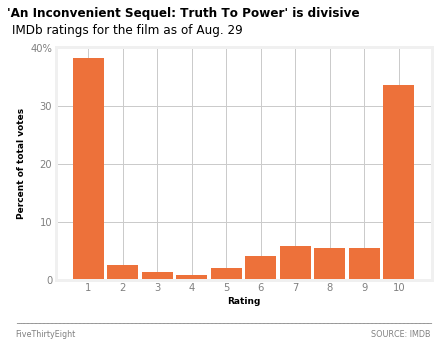

In [29]:
# generate graph

import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

fig.patch.set(facecolor='white')

ax.bar(x=range(1,11), height=plot_data['percent'], width=.9, color='#ED713A')

ax.set(facecolor='white')

ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", fontsize=12, fontweight='bold', x=.34, y=1.1) 

ax.set_ylabel('Percent of total votes', fontsize=9, fontweight='bold')

ax.set_xlabel('Rating', fontsize=9, fontweight='bold')

ax.text(s='IMDb ratings for the film as of Aug. 29', y=42.5, x=-1.2, fontsize=12)

ax.tick_params(colors='grey')
ax.set_yticklabels(['0', '10', '20', '30', '40%'], fontsize=10)
ax.set_yticks(range(0,50,10))

ax.set_xticklabels(range(1,11,1), rotation='horizontal', fontsize=10)
ax.set_xticks(range(1,11))
plt.annotate('________________________________________________________________________________________________________', (0,0), (-40, -35), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=8, color='grey')
plt.annotate('FiveThirtyEight', (0,0), (-40, -50), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=8, color='grey')
plt.annotate('SOURCE: IMDB', (0,0), (315, -50), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=8, color='grey')
fig.show()

In [101]:
# replicate https://projects.fivethirtyeight.com/trump-approval-ratings/
!wget https://projects.fivethirtyeight.com/trump-approval-data/approval_polllist.csv

--2020-03-12 21:20:11--  https://projects.fivethirtyeight.com/trump-approval-data/approval_polllist.csv
Resolving projects.fivethirtyeight.com (projects.fivethirtyeight.com)... 151.101.2.109, 151.101.66.109, 151.101.130.109, ...
Connecting to projects.fivethirtyeight.com (projects.fivethirtyeight.com)|151.101.2.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2827723 (2.7M) [text/csv]
Saving to: ‘approval_polllist.csv’

approval_polllist.c 100%[===================>]   2.70M  --.-KB/s    in 0.1s    

2020-03-12 21:20:11 (27.5 MB/s) - ‘approval_polllist.csv’ saved [2827723/2827723]



In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

poll = pd.read_csv('approval_polllist.csv')
poll.head()

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
0,Donald Trump,All polls,3/12/2020,1/20/2017,1/22/2017,Morning Consult,B/C,1992.0,rv,0.696984,0.0,46.0,37.0,44.654727,38.343661,NaN,NaN,http://static.politico.com/9b/13/82a3baf542ae9...,49249,77261,1/23/2017,16:57:25 12 Mar 2020
1,Donald Trump,All polls,3/12/2020,1/20/2017,1/22/2017,Gallup,B,1500.0,a,0.241682,0.0,45.0,45.0,45.688923,43.597452,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49253,77265,1/23/2017,16:57:25 12 Mar 2020
2,Donald Trump,All polls,3/12/2020,1/20/2017,1/24/2017,Ipsos,B-,1632.0,a,0.150785,0.0,42.1,45.2,42.849266,44.054346,NaN,T,http://polling.reuters.com/#poll/CP3_2/,49426,77599,3/1/2017,16:57:25 12 Mar 2020
3,Donald Trump,All polls,3/12/2020,1/21/2017,1/23/2017,Gallup,B,1500.0,a,0.223234,0.0,45.0,46.0,45.688923,44.597452,NaN,T,http://www.gallup.com/poll/201617/gallup-daily...,49262,77274,1/24/2017,16:57:25 12 Mar 2020
4,Donald Trump,All polls,3/12/2020,1/20/2017,1/25/2017,Quinnipiac University,B+,1190.0,rv,1.494494,0.0,36.0,44.0,37.558164,42.868848,NaN,NaN,https://poll.qu.edu/national/release-detail?Re...,49260,77272,1/26/2017,16:57:25 12 Mar 2020


In [104]:
poll.tail()

,president,subgroup,modeldate,startdate,enddate,pollster,grade,samplesize,population,weight,influence,approve,disapprove,adjusted_approve,adjusted_disapprove,multiversions,tracking,url,poll_id,question_id,createddate,timestamp
11268,Donald Trump,Voters,3/12/2020,3/8/2020,3/9/2020,HarrisX,C+,1001.0,rv,0.691603,0.601726,46.0,54.0,42.850555,52.689709,NaN,NaN,https://thehill.com/hilltv/what-americas-think...,64800,119940,3/11/2020,16:59:45 12 Mar 2020
11269,Donald Trump,Voters,3/12/2020,3/9/2020,3/10/2020,Ipsos,B-,961.0,rv,0.685071,0.641032,42.0,54.0,42.139169,52.114605,NaN,NaN,https://www.ipsos.com/en-us/news-polls/reuters...,64796,119932,3/11/2020,16:59:45 12 Mar 2020
11270,Donald Trump,Voters,3/12/2020,3/9/2020,3/11/2020,YouGov,B-,755.0,rv,0.165412,0.154514,44.0,54.0,43.118122,53.645400,NaN,NaN,https://docs.cdn.yougov.com/6skppne31l/tabs_Tr...,64797,119936,3/11/2020,16:59:45 12 Mar 2020
11271,Donald Trump,Voters,3/12/2020,3/9/2020,3/11/2020,Rasmussen Reports/Pulse Opinion Research,C+,1500.0,lv,0.490965,0.459777,48.0,50.0,43.501803,50.883978,NaN,T,http://www.rasmussenreports.com/public_content...,64809,119960,3/12/2020,16:59:45 12 Mar 2020
11272,Donald Trump,Voters,3/12/2020,3/10/2020,3/12/2020,YouGov,B-,738.0,rv,0.178130,0.178130,43.0,55.0,42.118122,54.645400,NaN,NaN,https://docs.cdn.yougov.com/hqg0thpf9l/tabs_Tr...,64813,119974,3/12/2020,16:59:45 12 Mar 2020


In [105]:
allpolls = poll[poll['subgroup'] == 'All polls']
cats = ['enddate','approve','disapprove']
final = allpolls[cats]
final

,enddate,approve,disapprove
0,1/22/2017,46.0,37.0
1,1/22/2017,45.0,45.0
2,1/24/2017,42.1,45.2
3,1/23/2017,45.0,46.0
4,1/25/2017,36.0,44.0
...,...,...,...
4662,3/10/2020,40.0,55.0
4663,3/11/2020,41.0,51.0
4664,3/11/2020,40.0,52.0
4665,3/12/2020,44.0,48.0


In [0]:
final['enddate'].col = pd.to_datetime(final['enddate'], infer_datetime_format = True)

In [0]:
final_app = final.groupby('enddate')['approve'].mean()

In [0]:
final_dis = final.groupby('enddate')['disapprove'].mean()

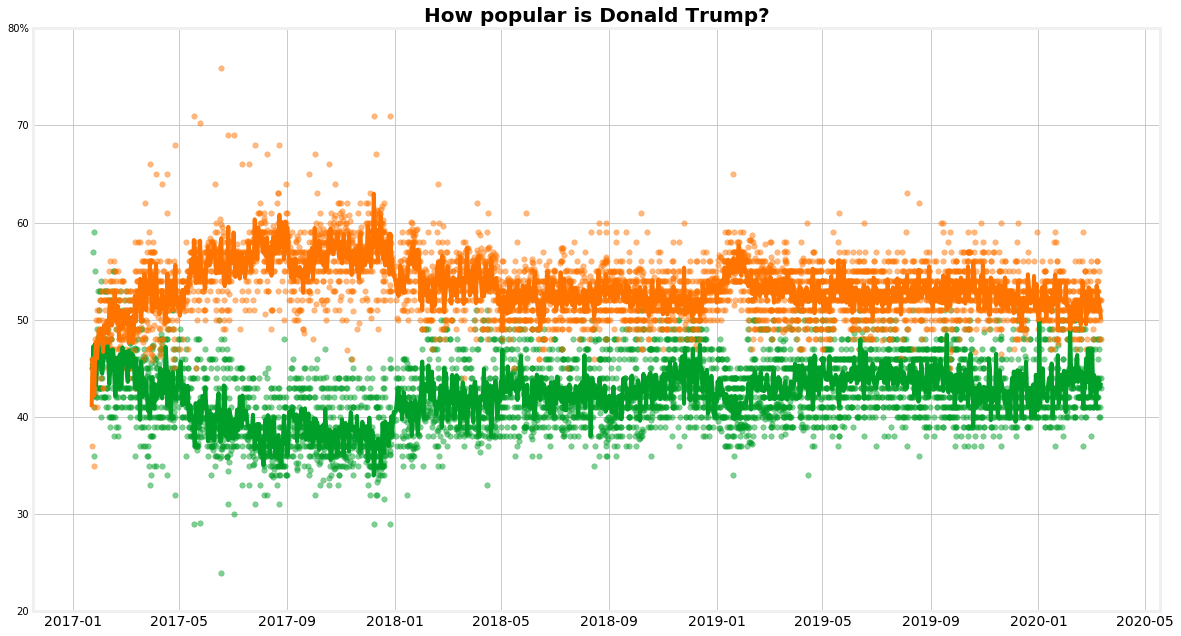

In [161]:
# generate graph (still working on date ticks)

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(18,10))
fig.patch.set(facecolor='white')
ax.scatter(final['enddate'], final['approve'], color='#009F29', s=30, alpha=.5)
ax.scatter(final['enddate'], final['disapprove'], color='#FF7400', s=30, alpha=.5)
ax.plot(final_app.index, final_app.values, color='#009F29')
ax.plot(final_dis.index, final_dis.values, color='#FF7400')

ax.set(facecolor='white')



ax.set_title("How popular is Donald Trump?", fontsize=20, fontweight='bold') 

#ax.xaxis.set_major_locator(plt.MaxNLocator(13))
#ax.set_xticks(range(1/3/2017,1/1/2020,10))
#ax.set_xticklabels(['Jan 23, 2017', 'April', 'July', 'Oct.'], fontsize=10)

ax.set_yticklabels(['20', '30', '40', '50', '60', '70', '80%'], fontsize=10)
ax.set_yticks(range(20,90,10))


plt.show()

 




In [1]:
### Set stylesheet
plt.style.use('fivethirtyeight')

### figure axes syntax
fig, ax = plt.subplots()

### Make the figure background color white
fig.patch.set(facecolor='white')

### put bars on the axes
final.plot.line


NameError: ignored

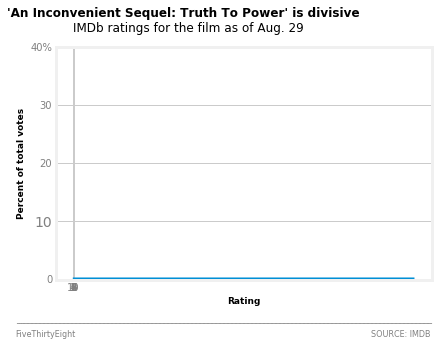

In [109]:
# generate graph

import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')




fig, ax = plt.subplots()

fig.patch.set(facecolor='white')

ax.plot(x, )

ax.set(facecolor='white')

ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", fontsize=12, fontweight='bold', x=.34, y=1.1) 

ax.set_ylabel('Percent of total votes', fontsize=9, fontweight='bold')

ax.set_xlabel('Rating', fontsize=9, fontweight='bold')

ax.text(s='IMDb ratings for the film as of Aug. 29', y=42.5, x=-1.2, fontsize=12)

ax.tick_params(colors='grey')
ax.set_yticklabels(['0', '10', '20', '30', '40%'], fontsize=10)
ax.set_yticks(range(0,50,10))

ax.set_xticklabels(range(1,11,1), rotation='horizontal', fontsize=10)
ax.set_xticks(range(1,11))
plt.annotate('________________________________________________________________________________________________________', (0,0), (-40, -35), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=8, color='grey')
plt.annotate('FiveThirtyEight', (0,0), (-40, -50), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=8, color='grey')
plt.annotate('SOURCE: IMDB', (0,0), (315, -50), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=8, color='grey')
fig.show()

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here